In [1]:
# Depencies
import pandas as pd

In [2]:
# Read reds_df from csv file
reds_df = pd.read_csv('data/reds_df.csv')
# Drop imported index
reds_df = reds_df.drop(['Unnamed: 0'], axis= 1)

In [3]:
reds_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alchohol,quality_category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,medium
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,medium
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,medium
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,medium
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,medium


In [51]:
reds_df['quality_category'].value_counts()

medium    1571
high        18
low         10
Name: quality_category, dtype: int64

In [4]:
# Install PyCaret
!pip install pycaret

In [5]:
#Check the shape of the data for white wines
print(f'Shape of the red wine data: {reds_df.shape}')

Shape of the red wine data: (1599, 12)


In [6]:
# Split data to create models and tunning
data_red = reds_df.sample(frac=0.95, random_state=786)
data_red_unseen = reds_df.drop(data_red.index)
data_red.reset_index(inplace= True, drop= True)
data_red_unseen.reset_index(inplace= True, drop= True)

print('Data for Modeling (reds): ' + str(data_red.shape))
print('----------------------------------------------------')
print('Unseen Data For Predictions (reds): ' + str(data_red_unseen.shape))

Data for Modeling (reds): (1519, 12)
----------------------------------------------------
Unseen Data For Predictions (reds): (80, 12)


In [7]:
# Import pycaret classification
from pycaret.classification import *

In [54]:
# Set up environment and create the transformation pipeline to prepare the data for modeling and deployment.
# Data Type Inference:  Any experiment performed in PyCaret begins with determining the correct data types for all features. The setup function performs essential inferences about the data and performs several downstream tasks such as ignoring ID and Date columns, categorical encoding, missing values imputation based on the data type inferred by PyCaret’s internal algorithm. Once the setup is executed a dialogue box (see example below) appears with the list of all the features and their inferred data types. Data type inferences are usually correct but once the dialogue box appears, user should review the list for accuracy. If all the data types are inferred correctly you may press enter to continue or if not you may type ‘quit‘ to stop the experiment.
print('Data set up for red wines')
exp_clf101 = setup(data = data_red, target = 'quality_category', session_id= 123, data_split_stratify= True)

,Description,Value
0,session_id,123
1,Target,quality_category
2,Target Type,Multiclass
3,Label Encoded,"high: 0, low: 1, medium: 2"
4,Original Data,"(1519, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
# Comparison of models --- whites
best_models_reds = compare_models(fold = 8)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9802,0.5499,0.3952,0.9646,0.9723,0.1475,0.1507,0.0062
lr,Logistic Regression,0.9793,0.7399,0.3333,0.9591,0.9691,0.0000,0.0000,0.7775
knn,K Neighbors Classifier,0.9793,0.5937,0.3333,0.9591,0.9691,0.0000,0.0000,0.4150
ridge,Ridge Classifier,0.9793,0.0000,0.3333,0.9591,0.9691,0.0000,0.0000,0.0100
rf,Random Forest Classifier,0.9793,0.7350,0.3744,0.9646,0.9716,0.1219,0.1415,0.0600
et,Extra Trees Classifier,0.9793,0.7425,0.3744,0.9646,0.9716,0.1219,0.1415,0.0575
lightgbm,Light Gradient Boosting Machine,0.9784,0.7269,0.3740,0.9646,0.9711,0.1210,0.1404,0.1688
lda,Linear Discriminant Analysis,0.9755,0.8219,0.3734,0.9608,0.9681,0.0577,0.0672,0.0075
gbc,Gradient Boosting Classifier,0.9727,0.7881,0.4135,0.9663,0.9692,0.1545,0.1663,0.1425
ada,Ada Boost Classifier,0.9690,0.5326,0.3298,0.9588,0.9638,-0.0060,-0.0064,0.0312


In [10]:
# Print the best model = Random Forest Classifier (based on accuracy) --- reds
print(best_models_reds)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


In [11]:
# List of the models
# Top 3: qda, lr, knn --- reds
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [12]:
# Creating the best model (random forrest classifier)
# Top 3: qda, lr, knn --- reds
qda_reds = create_model('qda', fold = 8)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9774,0.4688,0.3308,0.9700,0.9737,-0.0076,-0.0081
1,0.9774,0.6382,0.4974,0.9700,0.9737,0.3908,0.3994
2,0.9774,0.5000,0.3333,0.9554,0.9663,0.0000,0.0000
3,0.9774,0.5000,0.3333,0.9554,0.9663,0.0000,0.0000
4,0.9774,0.5000,0.3333,0.9554,0.9663,0.0000,0.0000
5,0.9774,0.5000,0.3333,0.9554,0.9663,0.0000,0.0000
6,0.9925,0.8170,0.6667,0.9850,0.9887,0.7969,0.8144
7,0.9848,0.4751,0.3333,0.9699,0.9773,0.0000,0.0000
Mean,0.9802,0.5499,0.3952,0.9646,0.9723,0.1475,0.1507
SD,0.0052,0.1125,0.1159,0.0103,0.0074,0.2770,0.2831


In [13]:
# Creating the best model (random forrest classifier)
# Top 3: qda, lr, knn --- reds
lr_reds = create_model('lr', fold = 8)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9850,0.7425,0.3333,0.9702,0.9775,0.0000,0.0000
1,0.9774,0.8628,0.3333,0.9554,0.9663,0.0000,0.0000
2,0.9774,0.8249,0.3333,0.9554,0.9663,0.0000,0.0000
3,0.9774,0.7851,0.3333,0.9554,0.9663,0.0000,0.0000
4,0.9774,0.6253,0.3333,0.9554,0.9663,0.0000,0.0000
5,0.9774,0.5337,0.3333,0.9554,0.9663,0.0000,0.0000
6,0.9774,0.8350,0.3333,0.9554,0.9663,0.0000,0.0000
7,0.9848,0.7099,0.3333,0.9699,0.9773,0.0000,0.0000
Mean,0.9793,0.7399,0.3333,0.9591,0.9691,0.0000,0.0000
SD,0.0032,0.1061,0.0000,0.0063,0.0048,0.0000,0.0000


In [14]:
# Creating the best model (random forrest classifier)
# Top 3: qda, lr, knn --- reds
knn_reds = create_model('knn', fold = 8)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9850,0.4848,0.3333,0.9702,0.9775,0.0000,0.0000
1,0.9774,0.7915,0.3333,0.9554,0.9663,0.0000,0.0000
2,0.9774,0.6221,0.3333,0.9554,0.9663,0.0000,0.0000
3,0.9774,0.6400,0.3333,0.9554,0.9663,0.0000,0.0000
4,0.9774,0.6412,0.3333,0.9554,0.9663,0.0000,0.0000
5,0.9774,0.4619,0.3333,0.9554,0.9663,0.0000,0.0000
6,0.9774,0.6349,0.3333,0.9554,0.9663,0.0000,0.0000
7,0.9848,0.4733,0.3333,0.9699,0.9773,0.0000,0.0000
Mean,0.9793,0.5937,0.3333,0.9591,0.9691,0.0000,0.0000
SD,0.0032,0.1059,0.0000,0.0063,0.0048,0.0000,0.0000


In [15]:
# Top 3: qda, lr, knn --- reds
print('qda for reds model')
print(qda_reds)
print('----------------------------------------------')
print('lr for reds model')
print(lr_reds)
print('----------------------------------------------')
print('knn for reds model')
print(knn_reds)
print('----------------------------------------------')

qda for reds model
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
----------------------------------------------
lr for reds model
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
----------------------------------------------
knn for reds model
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
----------------------------------------------


In [16]:
# Tune models for --- reds
# Top 3: qda, lr, knn --- reds
tuned_qda_reds = tune_model(qda_reds, fold = 8)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9850,0.6435,0.3333,0.9702,0.9775,0.0000,0.0000
1,0.9699,0.8455,0.4949,0.9674,0.9684,0.3206,0.3210
2,0.9774,0.7077,0.3333,0.9554,0.9663,0.0000,0.0000
3,0.9774,0.5390,0.3333,0.9554,0.9663,0.0000,0.0000
4,0.9549,0.5542,0.3256,0.9549,0.9549,-0.0192,-0.0192
5,0.9774,0.4103,0.3333,0.9554,0.9663,0.0000,0.0000
6,0.9774,0.6947,0.3333,0.9554,0.9663,0.0000,0.0000
7,0.9848,0.4316,0.3333,0.9699,0.9773,0.0000,0.0000
Mean,0.9755,0.6033,0.3526,0.9605,0.9679,0.0377,0.0377
SD,0.0090,0.1382,0.0538,0.0068,0.0067,0.1071,0.1072


In [17]:
# Tune models for --- reds
# Top 3: qda, lr, knn --- reds
tuned_lr_reds = tune_model(lr_reds, fold = 8)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9850,0.8144,0.3333,0.9702,0.9775,0.0000,0.0000
1,0.9850,0.8424,0.6667,0.9702,0.9775,0.4962,0.5759
2,0.9774,0.7843,0.3333,0.9554,0.9663,0.0000,0.0000
3,0.9774,0.8635,0.3333,0.9554,0.9663,0.0000,0.0000
4,0.9774,0.6654,0.3333,0.9554,0.9663,0.0000,0.0000
5,0.9774,0.5149,0.3333,0.9554,0.9663,0.0000,0.0000
6,0.9774,0.7945,0.3333,0.9554,0.9663,0.0000,0.0000
7,0.9848,0.7365,0.3333,0.9699,0.9773,0.0000,0.0000
Mean,0.9802,0.7520,0.3750,0.9609,0.9705,0.0620,0.0720
SD,0.0036,0.1068,0.1102,0.0071,0.0054,0.1641,0.1905


In [18]:
# Tune models for --- reds
# Top 3: qda, lr, knn --- reds
tuned_knn_reds = tune_model(knn_reds, fold = 8)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9850,0.6385,0.3333,0.9702,0.9775,0.0000,0.0000
1,0.9850,0.7787,0.5000,0.9777,0.9800,0.4953,0.5737
2,0.9774,0.7802,0.3333,0.9554,0.9663,0.0000,0.0000
3,0.9774,0.7810,0.3333,0.9554,0.9663,0.0000,0.0000
4,0.9774,0.6184,0.3333,0.9554,0.9663,0.0000,0.0000
5,0.9774,0.4314,0.3333,0.9554,0.9663,0.0000,0.0000
6,0.9850,0.7889,0.5000,0.9777,0.9800,0.4953,0.5737
7,0.9848,0.6832,0.3333,0.9699,0.9773,0.0000,0.0000
Mean,0.9812,0.6875,0.3750,0.9646,0.9725,0.1238,0.1434
SD,0.0037,0.1166,0.0722,0.0096,0.0063,0.2145,0.2484


In [19]:
# Top 3: qda, lr, knn --- reds
print('tuned qda for reds model')
print(tuned_qda_reds)
print('----------------------------------------------')
print('tuned lr for reds model')
print(tuned_lr_reds)
print('----------------------------------------------')
print('tuned knn for reds model')
print(tuned_knn_reds)
print('----------------------------------------------')

tuned qda for reds model
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)
----------------------------------------------
tuned lr for reds model
LogisticRegression(C=6.718000000000001, class_weight={}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
----------------------------------------------
tuned knn for reds model
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')
----------------------------------------------


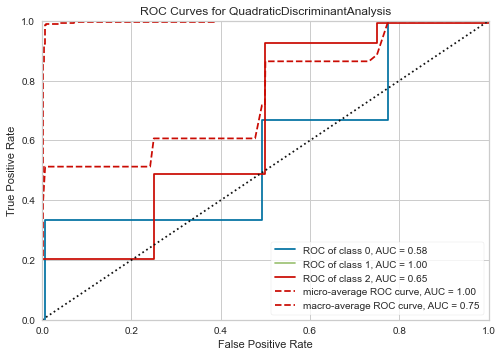

In [20]:
# plot models for accuracy
# Top 3: qda, lr, knn --- reds
plot_model(tuned_qda_reds, plot = 'auc')

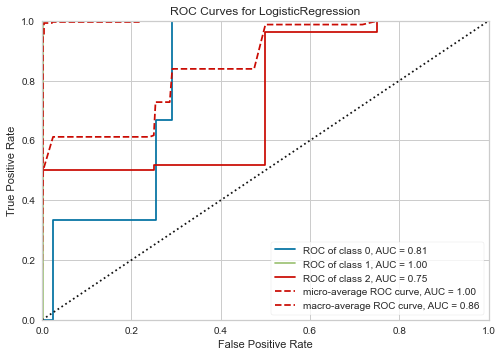

In [21]:
# plot models for accuracy
# Top 3: qda, lr, knn --- reds
plot_model(tuned_lr_reds, plot = 'auc')

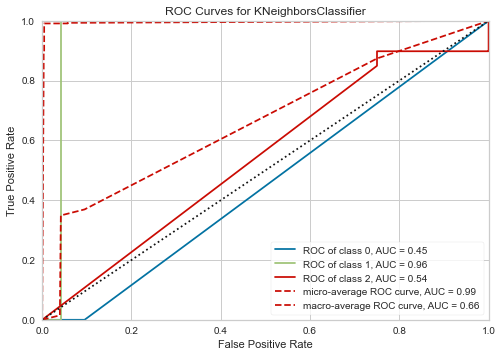

In [22]:
# plot models for accuracy
# Top 3: qda, lr, knn --- reds
plot_model(tuned_knn_reds, plot = 'auc')

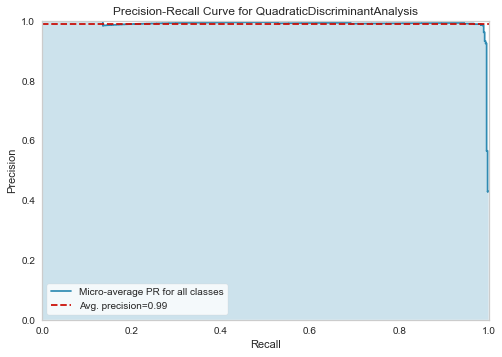

In [23]:
# plot models for precision-recall
# Top 3: qda, lr, knn --- reds
plot_model(tuned_qda_reds, plot = 'pr')

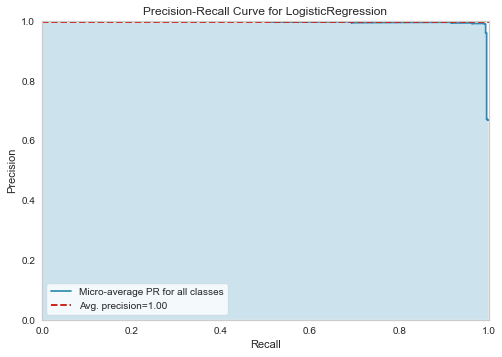

In [24]:
# plot models for precision-recall
# Top 3: qda, lr, knn --- reds
plot_model(tuned_lr_reds, plot = 'pr')

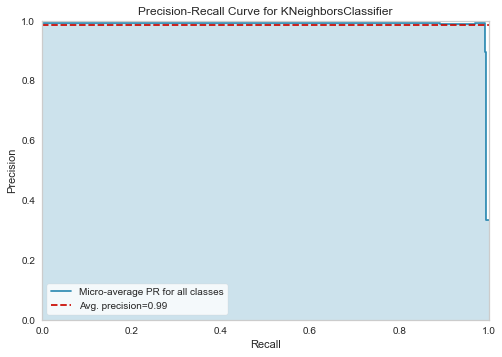

In [25]:
# plot models for precision-recall
# Top 3: qda, lr, knn --- reds
plot_model(tuned_knn_reds, plot = 'pr')

In [26]:
# plot models for feature importance
# Top 3: qda, lr, knn --- reds
# plot_model(tuned_qda_reds, plot = 'feature')
# ###### This feature not available for qda models ######

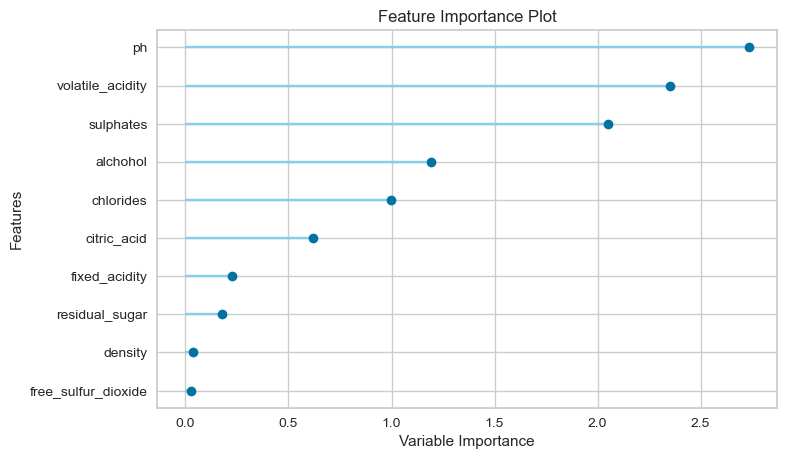

In [27]:
# plot models for feature importance
# Top 3: qda, lr, knn --- reds
plot_model(tuned_lr_reds, plot = 'feature')

In [28]:
# plot models for feature importance
# Top 3: qda, lr, knn --- reds
# plot_model(tuned_knn_reds, plot = 'feature')
# ###### This feature not available for qda models ######

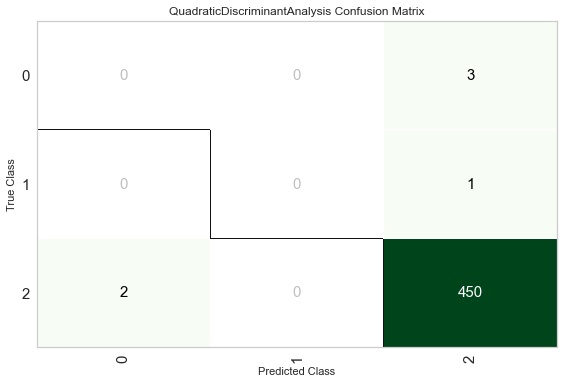

In [29]:
# plot models for confusion matrix
# Top 3: qda, lr, knn --- reds
plot_model(tuned_qda_reds, plot = 'confusion_matrix')

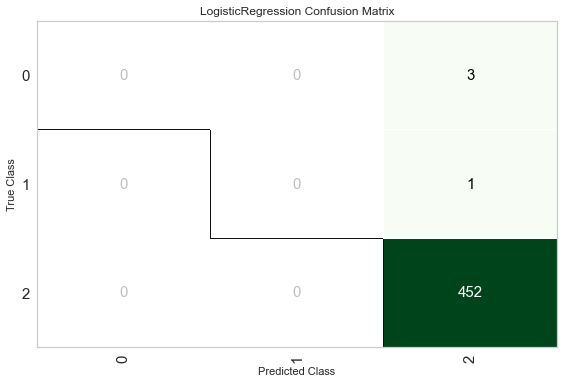

In [30]:
# plot models for confusion matrix
# Top 3: qda, lr, knn --- reds
plot_model(tuned_lr_reds, plot = 'confusion_matrix')

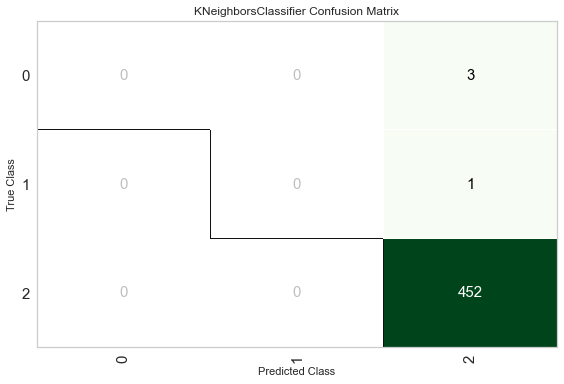

In [31]:
# plot models for confusion matrix
# Top 3: qda, lr, knn --- reds
plot_model(tuned_knn_reds, plot = 'confusion_matrix')

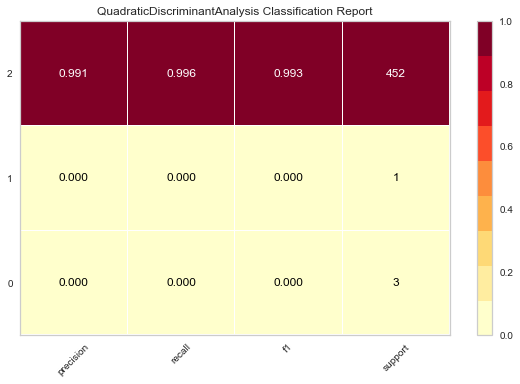

In [32]:
# plot models for classification report
# Top 3: qda, lr, knn --- reds
plot_model(tuned_qda_reds, plot = 'class_report')

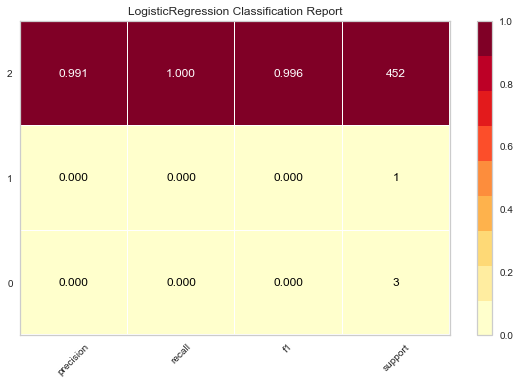

In [33]:
# plot models for classification report
# Top 3: qda, lr, knn --- reds
plot_model(tuned_lr_reds, plot = 'class_report')

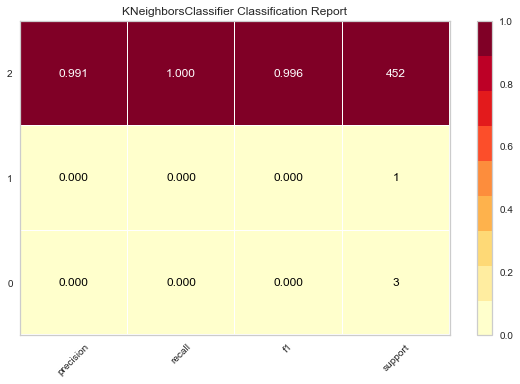

In [34]:
# plot models for classification report
# Top 3: qda, lr, knn --- reds
plot_model(tuned_knn_reds, plot = 'class_report')

In [35]:
# Only tunnning the top model, rf, since the top three models are so close will only focus on the top model.
# Another way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.
evaluate_model(tuned_qda_reds)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [36]:
#  Predict model, add probablylity of each category
predict_model(tuned_qda_reds, raw_score= True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.9868,0,0.3319,0.9825,0.9847,-0.0051,-0.0055


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alchohol,quality_category,Label,Score_high,Score_low,Score_medium
0,6.7,0.160,0.64,2.1,0.059,24.0,52.0,0.99494,3.34,0.71,11.2,medium,medium,0.0135,0.0000,0.9865
1,9.8,0.340,0.39,1.4,0.066,3.0,7.0,0.99470,3.19,0.55,11.4,medium,medium,0.0333,0.0000,0.9667
2,11.5,0.590,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.0,medium,medium,0.0003,0.0000,0.9997
3,7.1,0.590,0.02,2.3,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,medium,medium,0.0000,0.0000,1.0000
4,8.2,0.510,0.24,2.0,0.079,16.0,86.0,0.99764,3.34,0.64,9.5,medium,medium,0.0000,0.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,7.6,0.430,0.40,2.7,0.082,6.0,11.0,0.99538,3.44,0.54,12.2,medium,medium,0.1158,0.0001,0.8841
452,11.3,0.360,0.66,2.4,0.123,3.0,8.0,0.99642,3.20,0.53,11.9,medium,medium,0.0675,0.0000,0.9325
453,7.1,0.755,0.15,1.8,0.107,20.0,84.0,0.99593,3.19,0.50,9.5,medium,medium,0.0000,0.0000,1.0000
454,8.2,0.330,0.32,2.8,0.067,4.0,12.0,0.99473,3.30,0.76,12.8,medium,medium,0.2868,0.0000,0.7132


In [47]:
# Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production
final_reds_qda = finalize_model(tuned_qda_reds)

SyntaxError: invalid syntax (<ipython-input-47-285d23138bb2>, line 2)

In [ ]:
#  ###### Unable to finalize out models due to the structure of the data set for red wines #######